In [9]:
import pandas as pd
from IPython.display import display


In [2]:
blood_data = pd.read_csv('/Users/larsheijnen/Thesis/data/blood/Current_Biospecimen_Analysis_Results_29Mar2025.csv',low_memory=False)
blood_data.head()

,PATNO,SEX,COHORT,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
0,3400,Female,PD,SC,DNA,ApoE Genotype,e3/e3,NaN,2012-09-27,104,Andrew Singleton,National Institutes of Aging,2014-11-03 11:58:57.0
1,3401,Female,Control,SC,DNA,ApoE Genotype,e3/e3,NaN,2012-09-27,104,Andrew Singleton,National Institutes of Aging,2014-11-03 11:58:57.0
2,3402,Male,SWEDD,SC,DNA,ApoE Genotype,e3/e3,NaN,2012-09-27,104,Andrew Singleton,National Institutes of Aging,2014-11-03 11:58:57.0
3,3403,Male,PD,SC,DNA,ApoE Genotype,e3/e2,NaN,2012-09-27,104,Andrew Singleton,National Institutes of Aging,2014-11-03 11:58:57.0
4,3404,Female,Control,SC,DNA,ApoE Genotype,e4/e3,NaN,2012-09-27,104,Andrew Singleton,National Institutes of Aging,2014-11-03 11:58:57.0


In [3]:
print("Original head:")
print(blood_data.head())
print("\nData types before conversion:")
print(blood_data.dtypes)
print(f"\nNumber of non-null values in RUNDATE before conversion: {blood_data['RUNDATE'].notna().sum()}")
print(f"Total rows: {len(blood_data)}")

Original head:
   PATNO     SEX   COHORT CLINICAL_EVENT TYPE       TESTNAME TESTVALUE UNITS  \
0   3400  Female       PD             SC  DNA  ApoE Genotype     e3/e3   NaN   
1   3401  Female  Control             SC  DNA  ApoE Genotype     e3/e3   NaN   
2   3402    Male    SWEDD             SC  DNA  ApoE Genotype     e3/e3   NaN   
3   3403    Male       PD             SC  DNA  ApoE Genotype     e3/e2   NaN   
4   3404  Female  Control             SC  DNA  ApoE Genotype     e4/e3   NaN   

      RUNDATE  PROJECTID           PI_NAME                PI_INSTITUTION  \
0  2012-09-27        104  Andrew Singleton  National Institutes of Aging   
1  2012-09-27        104  Andrew Singleton  National Institutes of Aging   
2  2012-09-27        104  Andrew Singleton  National Institutes of Aging   
3  2012-09-27        104  Andrew Singleton  National Institutes of Aging   
4  2012-09-27        104  Andrew Singleton  National Institutes of Aging   

            update_stamp  
0  2014-11-03 11:58:

In [4]:
blood_data['RUNDATE'] = pd.to_datetime(blood_data['RUNDATE'], errors='coerce')

blood_data = blood_data.sort_values(by='PATNO', ascending=True)

In [ ]:
# blood_data.to_csv('/Users/larsheijnen/Thesis/data/blood/BLOOD_DATE_FORMATTED.csv', index=False)

In [5]:
print(blood_data['TYPE'].unique())

['Plasma' 'DNA' 'Serum' 'Cerebrospinal Fluid' 'miRNA' 'Whole Blood'
 'Urine' 'Tissue - Not Specified' 'PBMC' 'RNA' 'Cell Line']


In [6]:
blood_filtered_data_types = blood_data[blood_data['TYPE'] == 'Cerebrospinal Fluid']
blood_filtered_data_types = blood_filtered_data_types[blood_filtered_data_types['TESTNAME'].str.contains('Alpha-synuclein|pTau|ABeta 1-42|NFL|MTDNA_DELETION|IL-6|sTREM2|YKL40|GFAP|S100', case=False, na=False)]
print(blood_filtered_data_types['TESTNAME'].unique())

['ABeta 1-42' 'MTDNA_DELETION' 'pTau' 'CSF Alpha-synuclein' 'sTREM2' 'NFL'
 'GFAP' 'YKL40' 'S100' 'IL-6']


In [7]:
blood_filtered_data_types = blood_filtered_data_types.sort_values(by='PATNO', ascending=True)
blood_filtered_data_types = blood_filtered_data_types[~blood_filtered_data_types['CLINICAL_EVENT'].isin(['ST', 'U01'])]
blood_filtered_data_types.to_csv('/Users/larsheijnen/Thesis/data/blood/BLOOD_DATE_FORMATTED_CSF_FILTERED.csv', index=False)

In [ ]:
# print(blood_filtered_data_types['TYPE'].unique())
blood_alpha_synuclein = blood_filtered_data_types[blood_filtered_data_types['TESTNAME'].str.contains('CSF Alpha-synuclein', case=False, na=False)]
blood_pTau = blood_filtered_data_types[blood_filtered_data_types['TESTNAME'].str.contains('pTau', case=False, na=False)]

display(blood_pTau.head())
display(blood_alpha_synuclein.head())


# blood_alpha_synuclein.to_csv('/Users/larsheijnen/Thesis/data/blood/BLOOD_DATE_FORMATTED_CSF_FILTERED_ALPHA.csv', index=False)
# blood_pTau.to_csv('/Users/larsheijnen/Thesis/data/blood/BLOOD_DATE_FORMATTED_CSF_FILTERED_PTAU.csv', index=False)

,PATNO,SEX,COHORT,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
168908,3000,Female,Control,V08,Cerebrospinal Fluid,pTau,21.15,pg/mL,2017-06-27,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
171836,3000,Female,Control,V04,Cerebrospinal Fluid,pTau,17.3,pg/mL,2017-06-27,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
172910,3000,Female,Control,BL,Cerebrospinal Fluid,pTau,17.5,pg/mL,2017-06-27,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0
319951,3000,Female,Control,V12,Cerebrospinal Fluid,pTau,20.08,pg/mL,2021-03-03,159,Les Shaw,University of Pennsylvania,2021-05-26 07:14:12.0
173723,3001,Male,PD,V06,Cerebrospinal Fluid,pTau,13.66,pg/mL,2017-06-29,125,Les Shaw,University of Pennsylvania,2017-10-20 09:04:05.0


,PATNO,SEX,COHORT,CLINICAL_EVENT,TYPE,TESTNAME,TESTVALUE,UNITS,RUNDATE,PROJECTID,PI_NAME,PI_INSTITUTION,update_stamp
166116,3000,Female,Control,BL,Cerebrospinal Fluid,CSF Alpha-synuclein,1798.9,pg/ml,2016-10-11,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
165760,3000,Female,Control,V04,Cerebrospinal Fluid,CSF Alpha-synuclein,1547.0,pg/ml,2016-10-11,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
164781,3000,Female,Control,V08,Cerebrospinal Fluid,CSF Alpha-synuclein,1840.4,pg/ml,2016-10-11,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
165813,3001,Male,PD,V04,Cerebrospinal Fluid,CSF Alpha-synuclein,1546.7,pg/ml,2017-02-01,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0
166786,3001,Male,PD,V02,Cerebrospinal Fluid,CSF Alpha-synuclein,1713.8,pg/ml,2017-02-01,124,Peggy Taylor,Biolegend,2017-04-03 08:50:27.0


In [16]:
# blood_filtered_data_types[blood_filtered_data_types['PATNO'] == 3350]
# patno_counts = blood_alpha_synuclein['PATNO'].value_counts()
# patnos_with_5_visits = patno_counts[patno_counts == 5]
# print(patnos_with_5_visits)


# patno_counts = blood_pTau['PATNO'].value_counts()
# patnos_with_5_visits = patno_counts[patno_counts == 5]
# print(patnos_with_5_visits)



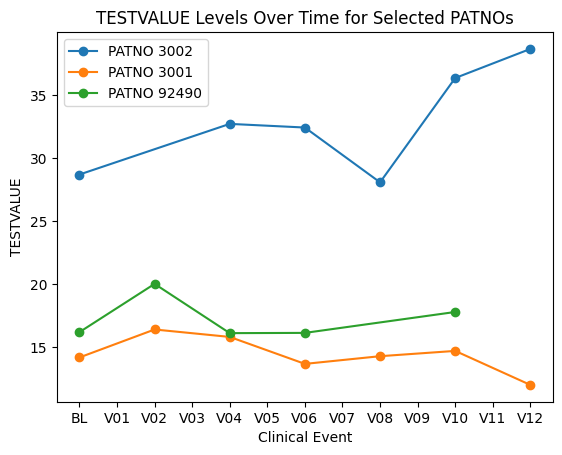

In [15]:
import matplotlib.pyplot as plt

# Define the function to plot the data
def plot_patnos(df, patnos):
    # Define the event order and mapping
    event_order = ['BL'] + [f'V{i:02d}' for i in range(1, 13)]  # Adjust range as needed
    event_map = {event: idx for idx, event in enumerate(event_order)}

    # Filter the data for the specified PATNOs
    filtered_data = df[df['PATNO'].isin(patnos)]

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot the temporal change for each PATNO
    for patno in patnos:
        patient_data = filtered_data[filtered_data['PATNO'] == patno].copy()
        patient_data['TESTVALUE'] = pd.to_numeric(patient_data['TESTVALUE'], errors='coerce')
        patient_data['order'] = patient_data['CLINICAL_EVENT'].astype(str).map(event_map)
        patient_data = patient_data.dropna(subset=['order']).sort_values(by='order')
        ax.plot(patient_data['order'], patient_data['TESTVALUE'], marker='o', label=f"PATNO {patno}")

    # Set axis labels and ticks
    ax.set_xticks(list(event_map.values()))
    ax.set_xticklabels(list(event_map.keys()))
    ax.set_xlabel("Clinical Event")
    ax.set_ylabel("TESTVALUE")
    ax.set_title("TESTVALUE Levels Over Time for Selected PATNOs")
    ax.legend()

    plt.show()

# Example usage
selected_patnos = [3002, 3001, 92490]  # Replace with your desired PATNOs
plot_patnos(blood_pTau, selected_patnos)

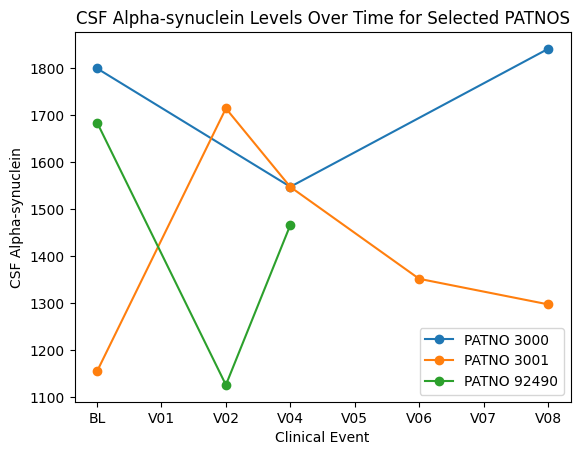

In [14]:
import matplotlib.pyplot as plt

# Define the full event order and mapping
event_order_full = ['BL', 'V01', 'V02', 'V04', 'V05', 'V06', 'V07', 'V08']
event_map = {event: idx for idx, event in enumerate(event_order_full)}

# Use the globally defined selected_patnos and blood_alpha_synuclein dataframe
filtered_data = blood_alpha_synuclein[blood_alpha_synuclein['PATNO'].isin(selected_patnos)]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the temporal change for each PATNO
for patno in selected_patnos:
    patient_data = filtered_data[filtered_data['PATNO'] == patno].copy()
    patient_data['TESTVALUE'] = pd.to_numeric(patient_data['TESTVALUE'], errors='coerce')
    patient_data['order'] = patient_data['CLINICAL_EVENT'].astype(str).map(event_map)
    patient_data = patient_data.dropna(subset=['order']).sort_values(by='order')
    ax.plot(patient_data['order'], patient_data['TESTVALUE'], marker='o', label=f"PATNO {patno}")

# Set axis labels and ticks
ax.set_xticks(list(event_map.values()))
ax.set_xticklabels(list(event_map.keys()))
ax.set_xlabel("Clinical Event")
ax.set_ylabel("CSF Alpha-synuclein")
ax.set_title("CSF Alpha-synuclein Levels Over Time for Selected PATNOS")
ax.legend()

plt.show()


Pearson correlation: -0.0257
P-value: 0.1650


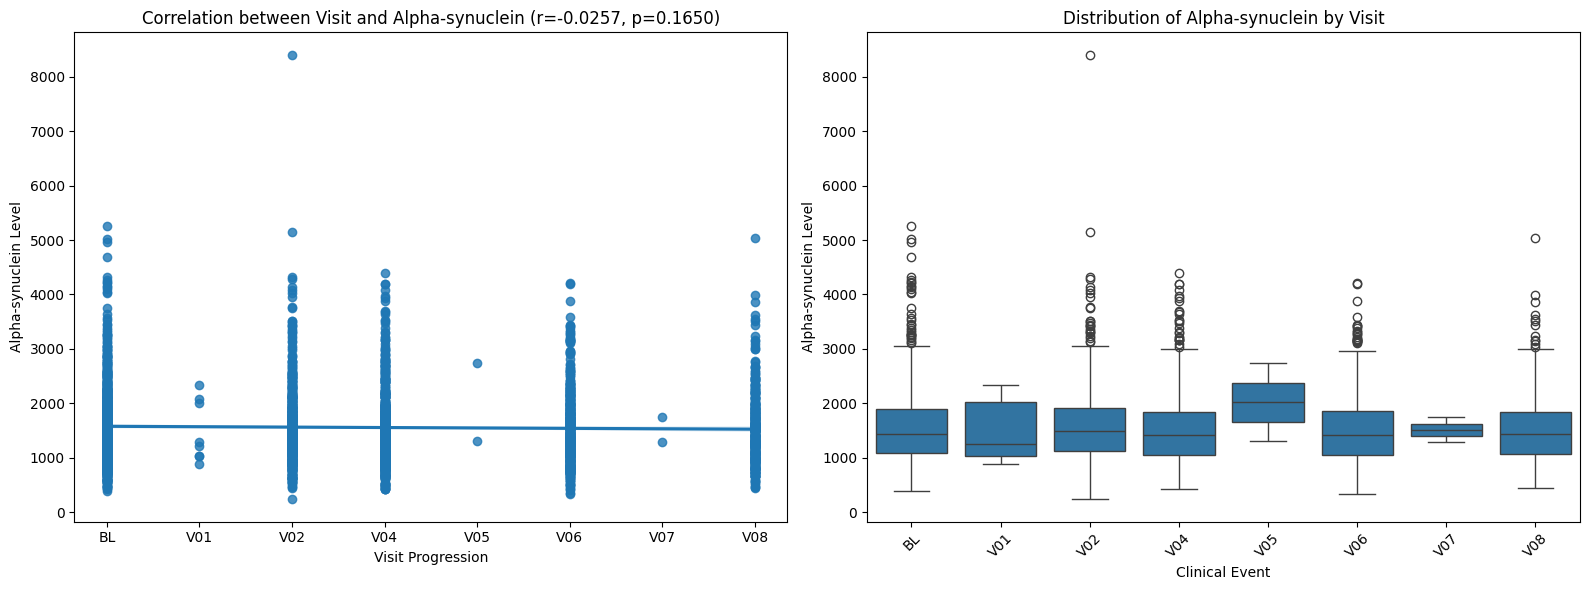


ANOVA results:
F-statistic: 0.8675
P-value: 0.5314
No significant differences between visits


In [20]:
# Convert CLINICAL_EVENT to numeric values for correlation analysis
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Define the visit order
event_order = ['BL', 'V01', 'V02', 'V04', 'V05', 'V06', 'V07', 'V08']
event_map = {event: idx for idx, event in enumerate(event_order)}

# Create a copy to avoid modifying the original dataframe
alpha_syn_analysis = blood_alpha_synuclein.copy()

# Convert CLINICAL_EVENT to numeric and TESTVALUE to numeric
alpha_syn_analysis['visit_numeric'] = alpha_syn_analysis['CLINICAL_EVENT'].map(event_map)
alpha_syn_analysis['TESTVALUE'] = pd.to_numeric(alpha_syn_analysis['TESTVALUE'], errors='coerce')

# Drop rows with missing values for analysis
clean_data = alpha_syn_analysis.dropna(subset=['visit_numeric', 'TESTVALUE'])

# Calculate correlation
correlation, p_value = stats.pearsonr(clean_data['visit_numeric'], clean_data['TESTVALUE'])
print(f"Pearson correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 1. Scatter plot with regression line
sns.regplot(x='visit_numeric', y='TESTVALUE', data=clean_data, ax=ax1)
ax1.set_xlabel('Visit Progression')
ax1.set_ylabel('Alpha-synuclein Level')
ax1.set_title(f'Correlation between Visit and Alpha-synuclein (r={correlation:.4f}, p={p_value:.4f})')
ax1.set_xticks(range(len(event_order)))
ax1.set_xticklabels(event_order)

# 2. Box plot to show distribution by visit
sns.boxplot(x='CLINICAL_EVENT', y='TESTVALUE', data=clean_data, order=event_order, ax=ax2)
ax2.set_xlabel('Clinical Event')
ax2.set_ylabel('Alpha-synuclein Level')
ax2.set_title('Distribution of Alpha-synuclein by Visit')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Check if there are significant differences between visits using ANOVA
groups = [clean_data[clean_data['CLINICAL_EVENT'] == event]['TESTVALUE'].values for event in event_order if event in clean_data['CLINICAL_EVENT'].values]
groups = [group for group in groups if len(group) > 0]  # Remove empty groups

if len(groups) > 1:  # Need at least 2 groups for ANOVA
    f_stat, anova_p = stats.f_oneway(*groups)
    print(f"\nANOVA results:")
    print(f"F-statistic: {f_stat:.4f}")
    print(f"P-value: {anova_p:.4f}")
    print(f"{'There are significant differences between visits' if anova_p < 0.05 else 'No significant differences between visits'}")